In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy
import csv

In [2]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

### TFS

In [3]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

In [4]:
def tfs_changes_occured(var, sec_var, n, ws=25):
    
    time_var = -1.0
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window
    for i in range(len(var) - ws + 1):
        var_mean = np.mean(var[0+i:ws+i])
        var_std_dev = np.std(var[0+i:ws+i])
        
        # check by var outliers
        if abs(var[ws+i-1] - var_mean) > (n * var_std_dev):
            if time_var == -1.0:
                time_var = (1+(ws+i-1)-1)/5
                break
                
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (2 + sec_var.index(val) - 1)/5
        
    
    var_hit = 0
    sec_var_hit = 0
    
    if time_var != -1.0:
        var_hit = 1
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return var_hit, time_var, sec_var_hit, time_sec_var, val, max_time
    
    

In [5]:
def pcd_tfs(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida-500w_10_.pcap'], window_size=200, dev=3, ws=25):
    
    # total flow size
    res_sum = {}
    res_var = {}
    res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]} {w}'
            res_var[name] = [None]
            res_sec_var[name] = [None, None]
            
            res_total = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum[name] = res_total
            
            for i in range(1, len(res_total)):
                res_var[name].append(res_total[i] - res_total[i-1])
                
            for i in range(2, len(res_var[name])):
                res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
    
    PCD_TFS = {}
    for d in datasets:
        PCD_TFS[d[:-5]] = {}
        for w in width:
            PCD_TFS[d[:-5]][w] = (0, 0)
    
    for i in range(len(label)):
        
        var_hit, time_var, sec_var_hit, time_sec_var, val, max_time = tfs_changes_occured(res_var[label[i]][1:], res_sec_var[label[i]][2:], dev, ws)
        
        d = label[i].split(" ")[0]
        w = int(label[i].split(" ")[1])
        
        if sec_var_hit == 0:
            PCD_TFS[d][w] = (0, 0)
        else:
            PCD_TFS[d][w] = (1, int(time_sec_var/(window_size/1000)))
            
    return PCD_TFS

In [6]:
def epi_tfs(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], 
                datasets=['caida-500w_10_.pcap'], window_size=200, PCD_TFS={}, predict_time=[0.2, 1.0, 2.0]):
    
    answer = {5000000: '500w',
              2500000: '250w', 
              1250000: '125w', 
              500000: '50w',
              }
    
    
    EPI_TFS = {}
    for d in datasets:
        EPI_TFS[d[:-5]] = {}
        for w in width:
            EPI_TFS[d[:-5]][w] = {}
            for t in predict_time:
                EPI_TFS[d[:-5]][w][t] = ""


    for d in datasets:
        for w in width:
            for t in predict_time:
                if PCD_TFS[d[:-5]][w][0] == 0: # no pattern change
                    EPI_TFS[d[:-5]][w][t] = d.split("_")[0].split("-")[1]
                else:
                    start_time = PCD_TFS[d[:-5]][w][1]
                    result = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)[start_time:]
    
                    # variation
                    res = []
                    fin_res_var = [None]
                    for i in range(1, len(result)):
                        fin_res_var.append(result[i] - result[i-1])    
                    res.append(fin_res_var)
                    
                    predict_tfs = sum(fin_res_var[1:min(len(fin_res_var), 1+int(t*1000/window_size))]) * (10/min((len(fin_res_var)-1)/5, t))
                    closest_key = min(answer.keys(), key=lambda x: abs(x - predict_tfs))
                    EPI_TFS[d[:-5]][w][t] = answer[closest_key]
    
    return EPI_TFS
    

### FSD

In [7]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=5000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [8]:
def fsd_changes_occured(sec_var, n, ws=25):
    
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window           
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (4 + sec_var.index(val) - 1)/5
        
    sec_var_hit = 0
    
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return sec_var_hit, time_sec_var, val, max_time
    
    

In [9]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [10]:
def normalize_fsd(fsd):
    fn = sum(list(fsd.values()))
    
    return {key: (val/fn) for key,val in fsd.items()}

In [11]:
def prepare_profiler_dirty_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=5000):
    
    profiler_fsd = {}
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file_new/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        profiler_fsd[file_name[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOffline/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [12]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    sorted_fsd = dict(sorted(list(avg_fsd.items())))
    
    return sorted_fsd


In [13]:
def find_dist_by_dirty_fsd(profiler_fsd, unknown_fsd):
    
    all_mrd = {}
    min_mrd = sys.float_info.max
    predict_dist = ""
    for name, dist in profiler_fsd.items():
        # mrd = calculate_mrd(dist, unknown_fsd)
        mrd = calculate_mrd(normalize_fsd(dist), normalize_fsd(unknown_fsd))
        all_mrd[name] = mrd
        if mrd < min_mrd:
            min_mrd = mrd
            predict_dist = name
    
    mrds = []
    for name, mrd in all_mrd.items():
        mrds.append(mrd)
        
    return predict_dist, mrds
    

In [14]:
def pcd_dist(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida-125w_10_.pcap'], window_size=200, dev=3, ws=25,k=5000):
    
    res_fsd = {}
    res_mrd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]} {w}'
            res_mrd[name] = [None, None] # 0, 1
            
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size,k)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            
            for i in range(1, len(res_fsd[name])):
                # res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                res_mrd[name].append(calculate_mrd(normalize_fsd(res_fsd[name][i-1]), normalize_fsd(res_fsd[name][i])))
                
    
    PCD_DIST = {}
    for d in datasets:
        PCD_DIST[d[:-5]] = {}
        for w in width:
            PCD_DIST[d[:-5]][w] = (0, 0)

    
    for i in range(len(label)):
        
        var_hit, time_var, val, max_time = fsd_changes_occured(res_mrd[label[i]][2:], dev, ws)
        
        d = label[i].split(" ")[0]
        w = int(label[i].split(" ")[1])
        
        if var_hit == 0:
            PCD_DIST[d][w] = (0, 0)
        else:
            PCD_DIST[d][w] = (1, int(time_var/(window_size/1000)))
            
    return PCD_DIST
    

In [15]:
def epi_dist(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida-125w_10_.pcap'], window_size=200, PCD_DIST={}, predict_time=[0.2, 1.0, 2.0], k=5000):
    
    res_fsd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]} {w}'
            
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size, k)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
    # find dist
    profiler_avg_fsd = {}
    success = 0
    for w in width:
        profiler_fsd = prepare_profiler_dirty_fsd_data(k=k, width=w)
        # prepare profiler avg dirty fsd
        profiler_avg_fsd[w] = {}
        for name, fsd_list in profiler_fsd.items():
            profiler_avg_fsd[w][name] = get_avg_fsd(fsd_list)
        
    EPI_DIST = {}
    for d in datasets:
        EPI_DIST[d[:-5]] = {}
        for w in width:
            EPI_DIST[d[:-5]][w] = {}
            for t in predict_time:
                EPI_DIST[d[:-5]][w][t] = ""
        
    for i in range(len(label)):
        d = label[i].split(" ")[0]
        w = int(label[i].split(" ")[1])
        
        for t in predict_time:
            if PCD_DIST[d][w][0] == 0: # no pattern change
                EPI_DIST[d][w][t] = d.split("_")[0].split("-")[0]
            else:
                start_time = PCD_DIST[d][w][1]
                
                vote = {}
            
                ### vote
                for j in range(min(int(t * 1000 / window_size), len(res_fsd[label[i]])-start_time)):
                    # print(start_time + j)
                    dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd[w], res_fsd[label[i]][start_time+j])
                    # print(dist_name)
                    if dist_name in vote:
                        vote[dist_name] += 1
                    else:
                        vote[dist_name] = 1
                        
                EPI_DIST[d][w][t] = max(vote, key=vote.get).split("-")[0]
            
    return EPI_DIST
 

### Final Predict

In [16]:
def config_mapping(dataset):
    config = {}
    config["caida-500w"] = "cs"
    config["caida-250w"] = "cs"
    config["caida-125w"] = "cm"
    config["caida-50w"] = "cm"
    config["zipf2-250w"] = "cs"
    config["zipf2-125w"] = "cm"
    config["zipf2-50w"] = "cm"
    config["zipf1-250w"] = "cm"
    config["zipf1-125w"] = "cm"
    config["zipf1-50w"] = "cm"
    
    if dataset not in config.keys():
        return "Error"
    
    return config[dataset]

In [20]:

def pattern_sensing(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=25, k=5000 , predict_time=[0.2, 1.0, 2.0]):
    
    # prepare time series data
    # TFS
    PCD_TFS = pcd_tfs(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, dev, ws)
    EPI_TFS = epi_tfs(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, PCD_TFS, predict_time) 
    
    # DIST
    PCD_DIST = pcd_dist(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, dev, ws)
    EPI_DIST = epi_dist(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, PCD_DIST, predict_time, k)
    
   

    # find cd error
    tfs_cd_err = {}
    fsd_cd_err = {}
    for d in datasets:
        for w in width:
            res = PCD_TFS[d[:-5]][w]
            if res[0] == 1:
                # print(d[:-5].split("_")[1], res[1])
                if d[:-5].split("_")[1] == "10":
                    err = round((res[1]-50)*0.2,2)
                else:
                    err = round((res[1]-30)*0.2,2)
                if err <= 1.0 and err >= -1.0:
                    if err not in tfs_cd_err.keys():
                        tfs_cd_err[err] = 1
                    else:
                        tfs_cd_err[err] += 1
            res2 = PCD_DIST[d[:-5]][w]
            if res2[0] == 1:
                # print(d[:-5], res[1])
                if d[:-5].split("_")[1] == "10":
                    err = round((res2[1]-50)*0.2,2)
                else:
                    err = round((res2[1]-30)*0.2,2)
                if err <= 1.0 and err >= -1.0:
                    if err not in fsd_cd_err.keys():
                        fsd_cd_err[err] = 1
                    else:
                        fsd_cd_err[err] += 1
                
    # Writing the data to a CSV file
    with open('../result_plot/5_overall/cd-tfs_error.csv', mode='w',newline='') as file:
        writer = csv.writer(file)
        for key, value in dict(sorted(tfs_cd_err.items())).items():
            writer.writerow([key, value])
    with open('../result_plot/5_overall/cd-fsd_error.csv', mode='w',newline='') as file:
        writer = csv.writer(file)
        for key, value in dict(sorted(fsd_cd_err.items())).items():
            writer.writerow([key, value])
        
    
    acc = [0] * len(predict_time)
    cfg_changed_acc = [0] * len(predict_time)
    cfg_nochanged_acc = [0] * len(predict_time)
    cfg_changed_num = [0] * len(predict_time)
    cfg_nochanged_num = [0] * len(predict_time)
    
    for d in datasets:
        for w in width:
            # print(d)
            # print(f'\tTFS changing time:  {PCD_TFS[d[:-5]][w][1]*0.2}s')
            # print(f'\tDIST changing time: {PCD_DIST[d[:-5]][w][1]*0.2}s')
            
            previous_pattern = d.split("_")[0]
            current_pattern = (d.split("_")[0] if "10" in d else d.split("_")[2])
            # print(f'\t      Current Pattern: {current_pattern}')
            for i, t in enumerate(predict_time):
                predict_pattern = f'{EPI_DIST[d[:-5]][w][t]}-{EPI_TFS[d[:-5]][w][t]}'
                # print(f'\tt={t} Predict Pattern: {predict_pattern}')
                
                # cal acc
                if current_pattern == predict_pattern:
                    acc[i] += 1

                if config_mapping(previous_pattern) == config_mapping(current_pattern): # config no changed
                    cfg_nochanged_num[i] += 1
                    if config_mapping(current_pattern) == config_mapping(predict_pattern):
                        cfg_nochanged_acc[i] += 1
                    # else:
                        # print("[failed] no change")
                else: # config changed
                    cfg_changed_num[i] += 1
                    if config_mapping(current_pattern) == config_mapping(predict_pattern):
                        cfg_changed_acc[i] += 1
                    # else:
                        # print("[failed] change")
            # print()
            
    
    # Writing the data to a CSV file
    with open('../result_plot/5_overall/output.csv', mode='w',newline='') as file:
        writer = csv.writer(file)
        
        writer.writerow(['tracking time', 'pattern_acc', 'cfg_acc', 'no_change', 'change'])
        
        for i, t in enumerate(predict_time):
            writer.writerow([t, acc[i], (cfg_nochanged_acc[i]+cfg_changed_acc[i]), f'{cfg_nochanged_acc[i]}/{cfg_nochanged_num[i]}', f'{cfg_changed_acc[i]}/{cfg_changed_num[i]}'])
    
                
    # print()
    for i, t in enumerate(predict_time):
        print(f't={t}')
        print(f'\tpattern acc      ={acc[i]}/100')
        print(f'\tpredict acc      = {cfg_nochanged_acc[i]+cfg_changed_acc[i]}')
        print(f'\t no change       ={cfg_nochanged_acc[i]}/{cfg_nochanged_num[i]}')
        print(f'\t change          ={cfg_changed_acc[i]}/{cfg_changed_num[i]}')
        
    return

pattern_sensing(datasets=pcap_file, width=[4096])


t=0.2
	pattern acc      =52/100
	predict acc      = 78
	 no change       =54/58
	 change          =24/42
t=1.0
	pattern acc      =78/100
	predict acc      = 97
	 no change       =57/58
	 change          =40/42
t=2.0
	pattern acc      =79/100
	predict acc      = 98
	 no change       =57/58
	 change          =41/42


## Plot overall Performance
---


In [38]:
def prepare_hh_dict(mem):
    hh_dict = {}
    if mem == "16KB":
        hh_dict["caida-500w"] = (31.05, 16.41, 192.12, "cs")
        hh_dict["caida-250w"] = (17.26, 10.83, 181.92, "cs")
        hh_dict["caida-125w"] = (7.75, 6.28, 71.08, "cs")
        hh_dict["caida-50w"]  = (4.31, 6.59, 97.52, "cm")
        hh_dict["zipf2-250w"] = (11.02, 10.61, 129.77, "cs")
        hh_dict["zipf2-125w"] = (6.75, 6.03, 142.88, "cs")
        hh_dict["zipf2-50w"]  = (6.35, 6.40, 144.15, "cm")
        hh_dict["zipf1-250w"] = (16.38, 13.27, 98.01, "cs")
        hh_dict["zipf1-125w"] = (6.11, 8.28, 69.84, "cm")
        hh_dict["zipf1-50w"]  = (2.78, 8.90, 52.66, "cm")
    elif mem == "32KB":
        hh_dict["caida-500w"] = (11.49, 7.32, 100.92, "cs")
        hh_dict["caida-250w"] = (5.92, 4.44, 75.71, "cs")
        hh_dict["caida-125w"] = (2.88, 2.71, 34.63, "cs")
        hh_dict["caida-50w"]  = (1.07, 2.07, 42.20, "cm")
        hh_dict["zipf2-250w"] = (3.81, 5.16, 77.63,  "cm")
        hh_dict["zipf2-125w"] = (2.93, 3.15, 72.63, "cm")
        hh_dict["zipf2-50w"]  = (2.41, 2.99, 63.39,  "cm")
        hh_dict["zipf1-250w"] = (4.48, 6.60, 43.90,  "cm")
        hh_dict["zipf1-125w"] = (1.28, 3.39, 20.86, "cm")
        hh_dict["zipf1-50w"]  = (0.15, 2.08, 14.42, "cm")
    elif mem == "64KB":
        hh_dict["caida-500w"] = (3.76, 3.43, 54.25, "cs")
        hh_dict["caida-250w"] = (2.11, 1.70, 26.64, "cs")
        hh_dict["caida-125w"] = (1.03, 1.72, 15.92, "cm")
        hh_dict["caida-50w"]  = (0.27, 0.47, 12.22, "cm")
        hh_dict["zipf2-250w"] = (1.51, 1.27, 50.20, "cs")
        hh_dict["zipf2-125w"] = (1.02, 1.31, 30.92, "cm")
        hh_dict["zipf2-50w"]  = (0.70, 1.20, 12.36, "cm")
        hh_dict["zipf1-250w"] = (1.42, 3.41, 16.76, "cm")
        hh_dict["zipf1-125w"] = (0.41, 1.56, 7.23, "cm")
        hh_dict["zipf1-50w"]  = (0.04, 0.54, 12.09, "cm")
    elif mem == "128KB":
        hh_dict["caida-500w"] = (1.16, 1.35, 18.70, "cm")
        hh_dict["caida-250w"] = (0.84, 1.14, 6.71,  "cm")
        hh_dict["caida-125w"] = (0.31, 0.64, 4.19,  "cm")
        hh_dict["caida-50w"]  = (0.07, 0.19, 4.10, "cm")
        hh_dict["zipf2-250w"] = (0.56, 0.43, 20.15, "cs")
        hh_dict["zipf2-125w"] = (0.43, 0.28, 11.18,  "cs")
        hh_dict["zipf2-50w"]  = (0.24, 0.68, 6.66,   "cm")
        hh_dict["zipf1-250w"] = (0.22, 0.78, 4.19,  "cm")
        hh_dict["zipf1-125w"] = (0.05, 0.43, 3.08, "cm")
        hh_dict["zipf1-50w"]  = (0.02, 0.13, 2.75, "cm")
    elif mem == "256KB":
        hh_dict["caida-500w"] = (0.44, 0.75, 7.14, "cm")
        hh_dict["caida-250w"] = (0.21, 0.58, 2.74, "cm")
        hh_dict["caida-125w"] = (0.09, 0.20, 2.11,  "cm")
        hh_dict["caida-50w"]  = (0.01, 0.04, 1.07, "cm")
        hh_dict["zipf2-250w"] = (0.21, 0.13, 5.83,  "cs")
        hh_dict["zipf2-125w"] = (0.16, 0.13, 4.63,  "cs")
        hh_dict["zipf2-50w"]  = (0.07, 0.10, 4.40,   "cm")
        hh_dict["zipf1-250w"] = (0.01, 0.14, 3.18,  "cm")
        hh_dict["zipf1-125w"] = (0, 0.01, 0.69, "cm")
        hh_dict["zipf1-50w"]  = (0, 0.08, 0.18, "cm")
    elif mem == "512KB":
        hh_dict["caida-500w"] = (0.12, 0.20, 3.62, "cm")
        hh_dict["caida-250w"] = (0.04, 0.12, 0.84, "cm")
        hh_dict["caida-125w"] = (0.01, 0.05, 0.23,  "cm")
        hh_dict["caida-50w"]  = (0.01, 0.01, 0.64,  "cm")
        hh_dict["zipf2-250w"] = (0.08, 0.06, 1.99,"cs")
        hh_dict["zipf2-125w"] = (0.04, 0.04, 1.59,  "cm")
        hh_dict["zipf2-50w"]  = (0.02, 0.04, 2.17,  "cm")
        hh_dict["zipf1-250w"] = (0, 0.02, 0.82, "cm")
        hh_dict["zipf1-125w"] = (0, 0.01, 1.28, "cm")
        hh_dict["zipf1-50w"]  = (0, 0, 0.03, "cm")
        
    return hh_dict

In [39]:
def prepare_fsd_dict(mem):
    fsd_dict = {}
    if mem == "16KB":
        fsd_dict["caida-500w"] = (1.82, 1.54, "cs")
        fsd_dict["caida-250w"] = (1.54, 1.36, "cs")
        fsd_dict["caida-125w"] = (1.31, 1.15, "cs")
        fsd_dict["caida-50w"]  = (1.02,  0.90, "cs")
        fsd_dict["zipf2-250w"] = (1.59, 1.36, "cs")
        fsd_dict["zipf2-125w"] = (1.37, 1.17, "cs")
        fsd_dict["zipf2-50w"]  = (1.28, 0.89, "cs")
        fsd_dict["zipf1-250w"] = (1.37, 1.39, "cm")
        fsd_dict["zipf1-125w"] = (1.02, 1.12, "cm")
        fsd_dict["zipf1-50w"]  = (0.48, 0.66, "cm")
    elif mem == "32KB":
        fsd_dict["caida-500w"] = (1.61, 1.31,  "cs")
        fsd_dict["caida-250w"] = (1.35, 1.18,  "cs")
        fsd_dict["caida-125w"] = (1.05, 1.03, "cs")
        fsd_dict["caida-50w"]  = (0.75, 0.80,"cm")
        fsd_dict["zipf2-250w"] = (1.32, 1.22, "cs")
        fsd_dict["zipf2-125w"] = (1.11, 1.02,  "cs")
        fsd_dict["zipf2-50w"]  = (1.05, 0.78,  "cs")
        fsd_dict["zipf1-250w"] = (1.04, 1.12,  "cm")
        fsd_dict["zipf1-125w"] = (0.61, 0.80,  "cm")
        fsd_dict["zipf1-50w"]  = (0.19, 0.35,  "cm")
    elif mem == "64KB":
        fsd_dict["caida-500w"] = (1.35, 1.32, "cs")
        fsd_dict["caida-250w"] = (1.14, 1.13,  "cs")
        fsd_dict["caida-125w"] = (0.96, 0.97, "cm")
        fsd_dict["caida-50w"]  = (0.61, 0.68, "cm")
        fsd_dict["zipf2-250w"] = (1.22, 1.11,  "cs")
        fsd_dict["zipf2-125w"] = (1.04, 0.93,  "cs")
        fsd_dict["zipf2-50w"]  = (0.91, 0.68,  "cs")
        fsd_dict["zipf1-250w"] = (0.70, 0.87,  "cm")
        fsd_dict["zipf1-125w"] = (0.28, 0.52,  "cm")
        fsd_dict["zipf1-50w"]  = (0.04, 0.15,  "cm")
    elif mem == "128KB":
        fsd_dict["caida-500w"] = (1.23, 1.24, "cm")
        fsd_dict["caida-250w"] = (1.07, 1.05, "cs")
        fsd_dict["caida-125w"] = (0.87, 0.86,  "cs")
        fsd_dict["caida-50w"]  = (0.37, 0.50, "cm")
        fsd_dict["zipf2-250w"] = (1.09, 1.08,  "cs")
        fsd_dict["zipf2-125w"] = (0.95, 0.88,  "cs")
        fsd_dict["zipf2-50w"]  = (0.71, 0.53,  "cs")
        fsd_dict["zipf1-250w"] = (0.30, 0.52, "cm")
        fsd_dict["zipf1-125w"] = (0.08, 0.25,  "cm")
        fsd_dict["zipf1-50w"]  = (0.01, 0.05,  "cm")
    elif mem == "256KB":
        fsd_dict["caida-500w"] = (1.24, 1.16,  "cs")
        fsd_dict["caida-250w"] = (1.00, 0.95,  "cs")
        fsd_dict["caida-125w"] = (0.52, 0.68,  "cm")
        fsd_dict["caida-50w"]  = (0.14, 0.28, "cm")
        fsd_dict["zipf2-250w"] = (1.09, 1.05,  "cs")
        fsd_dict["zipf2-125w"] = (0.90, 0.80,  "cs")
        fsd_dict["zipf2-50w"]  = (0.53, 0.49, "cs")
        fsd_dict["zipf1-250w"] = (0.07, 0.24,  "cm")
        fsd_dict["zipf1-125w"] = (0.01, 0.08, "cm")
        fsd_dict["zipf1-50w"]  = (0.01, 0.01, "cm")
    elif mem == "512KB":
        fsd_dict["caida-500w"] = (1.07, 1.12,  "cm")
        fsd_dict["caida-250w"] = (0.57, 0.76, "cm")
        fsd_dict["caida-125w"] = (0.21, 0.39, "cm")
        fsd_dict["caida-50w"]  = (0.03, 0.13, "cm")
        fsd_dict["zipf2-250w"] = (1.04, 0.98, "cs")
        fsd_dict["zipf2-125w"] = (0.73, 0.70,  "cs")
        fsd_dict["zipf2-50w"]  = (0.26, 0.32, "cm")
        fsd_dict["zipf1-250w"] = (0.01, 0.09, "cm")
        fsd_dict["zipf1-125w"] = (0, 0.03, "cm")
        fsd_dict["zipf1-50w"]  = (0, 0.01, "cm")    
    
    return fsd_dict


In [40]:
def prepare_ent_dict(mem):
    ent_dict = {}
    if mem == "16KB":
        ent_dict["caida-500w"] = (23.56, 60.63, 233.84, "cm")
        ent_dict["caida-250w"] = (19.44, 51.58, 188.73, "cm")
        ent_dict["caida-125w"] = (14.83, 41.32, 187.74, "cm")
        ent_dict["caida-50w"]  = (9.77, 28.14, 161.84, "cm")
        ent_dict["zipf2-250w"] = (19.90, 47.59, 336.37, "cm")
        ent_dict["zipf2-125w"] = (16.64, 41.70, 280.98, "cm")
        ent_dict["zipf2-50w"]  = (12.21, 32.37, 189.95, "cm")
        ent_dict["zipf1-250w"] = (14.12, 45.04, 115.29, "cm")
        ent_dict["zipf1-125w"] = (9.42, 30.34, 89.77, "cm")
        ent_dict["zipf1-50w"]  = (5.32, 15.06, 56.33, "cm")
    elif mem == "32KB":
        ent_dict["caida-500w"] = (17.61, 50.30, 118.04, "cm")
        ent_dict["caida-250w"] = (13.93, 40.35, 101.52, "cm")
        ent_dict["caida-125w"] = (10.18, 31.32, 88.60, "cm")
        ent_dict["caida-50w"]  = (6.01, 19.41, 71.84,  "cm")
        ent_dict["zipf2-250w"] = (14.95, 39.46, 190.56,  "cm")
        ent_dict["zipf2-125w"] = (12.46, 34.12, 140.14, "cm")
        ent_dict["zipf2-50w"]  = (8.65, 25.82, 80.29,  "cm")
        ent_dict["zipf1-250w"] = (8.80, 30.82, 50.38,  "cm")
        ent_dict["zipf1-125w"] = (5.34, 18.56, 52.21, "cm")
        ent_dict["zipf1-50w"]  = (3.03, 8.39, 22.01, "cm")
    elif mem == "64KB":
        ent_dict["caida-500w"] = (12.64, 39.29, 52.38, "cm")
        ent_dict["caida-250w"] = (9.45, 30.20, 46.12,   "cm")
        ent_dict["caida-125w"] = (6.43, 22.49, 35.50,  "cm")
        ent_dict["caida-50w"]  = (3.44, 12.31, 24.24, "cm")
        ent_dict["zipf2-250w"] = (11.04, 32.17, 96.36,  "cm")
        ent_dict["zipf2-125w"] = (9.06, 27.87, 59.36, "cm")
        ent_dict["zipf2-50w"]  = (6.06, 20.59, 29.93,  "cm")
        ent_dict["zipf1-250w"] = (5.08, 19.13, 24.47, "cm")
        ent_dict["zipf1-125w"] = (3.02, 10.26, 23.74, "cm")
        ent_dict["zipf1-50w"]  = (1.66, 4.51, 16.90, "cm")
    elif mem == "128KB":
        ent_dict["caida-500w"] = (8.55, 29.86, 20.32,  "cm")
        ent_dict["caida-250w"] = (6.12, 21.92, 14.85,  "cm")
        ent_dict["caida-125w"] = (3.93, 14.70, 12.33, "cm")
        ent_dict["caida-50w"]  = (1.88, 7.27,  8.79, "cm")
        ent_dict["zipf2-250w"] = (7.90, 26.05, 41.59, "cm")
        ent_dict["zipf2-125w"] = (6.22, 22.13, 21.97,  "cm")
        ent_dict["zipf2-50w"]  = (3.93, 15.63, 6.91,  "cm")
        ent_dict["zipf1-250w"] = (2.74, 10.91, 15.80, "cm")
        ent_dict["zipf1-125w"] = (1.52, 5.74, 10.28, "cm")
        ent_dict["zipf1-50w"]  = (0.92, 2.77, 7.74, "cm")
    elif mem == "256KB":
        ent_dict["caida-500w"] = (5.46, 21.10, 2.28,  "univmon")
        ent_dict["caida-250w"] = (3.68, 14.52, 2.68, "univmon")
        ent_dict["caida-125w"] = (2.25, 8.75, 1.81, "univmon")
        ent_dict["caida-50w"]  = (0.98, 3.92, 0.15, "univmon")
        ent_dict["zipf2-250w"] = (5.55, 20.80, 13.68, "cm")
        ent_dict["zipf2-125w"] = (4.15, 17.00, 3.92, "univmon")
        ent_dict["zipf2-50w"]  = (2.38, 11.07, 3.67,  "cm")
        ent_dict["zipf1-250w"] = (1.46, 5.82, 6.16, "cm")
        ent_dict["zipf1-125w"] = (0.84, 3.08, 5.11,  "cm")
        ent_dict["zipf1-50w"]  = (0.45, 1.68, 6.96, "cm")
    elif mem == "512KB":
        ent_dict["caida-500w"] = (3.24, 13.81, 3.97, "cm")
        ent_dict["caida-250w"] = (2.08, 8.85, 7.92,  "cm")
        ent_dict["caida-125w"] = (1.21, 4.86, 0.30, "univmon")
        ent_dict["caida-50w"]  = (0.49, 2.10, 1.03, "cm")
        ent_dict["zipf2-250w"] = (3.66, 15.95, 4.48, "cm")
        ent_dict["zipf2-125w"] = (2.58, 12.26, 3.86, "cm")
        ent_dict["zipf2-50w"]  = (1.37, 7.15, 7.42, "cm")
        ent_dict["zipf1-250w"] = (0.76, 2.96, 4.23, "cm")
        ent_dict["zipf1-125w"] = (0.48, 1.68, 3.95, "cm")
        ent_dict["zipf1-50w"]  = (0.22, 0.84, 6.21, "cm")


    return ent_dict


In [46]:
def prepare_profile_selection(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=25, k=5000 , predict_time=[1.0]):
    
    # prepare time series data
    # TFS
    CD_TFS = pcd_tfs(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, dev, ws)
    PI_TFS = epi_tfs(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, CD_TFS, predict_time)
    
    # FSD
    CD_FSD = pcd_dist(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, dev, ws)
    PI_FSD = epi_dist(algo, row, width, level, seed, count, flowkey, epochs, datasets, window_size, CD_FSD, predict_time, k)
    
    predict = {}
    unchange = {}
    oracle = {}
    
    for w in width:
        predict[w] = []
        unchange[w] = []
        oracle[w] = []
    
    for d in datasets:
        for w in width:
            # print(d)
            # print(f'\tTFS changing time:  {PCD_TFS[d[:-5]][w][1]*0.2}s')
            # print(f'\tDIST changing time: {PCD_DIST[d[:-5]][w][1]*0.2}s')
            
            previous_pattern = d.split("_")[0]
            current_pattern = (d.split("_")[0] if "10" in d else d.split("_")[2])
            predict_pattern = f'{PI_FSD[d[:-5]][w][predict_time[0]]}-{PI_TFS[d[:-5]][w][predict_time[0]]}'
            
            predict[w].append(predict_pattern)
            unchange[w].append(previous_pattern)
            oracle[w].append(current_pattern)
        
    return (oracle, predict, unchange)


{1024: [8.3, 8.41, 10.01], 2048: [3.06, 3.27, 3.75], 4096: [1.13, 1.14, 1.36], 8192: [0.36, 0.38, 0.43], 16384: [0.11, 0.11, 0.14]}


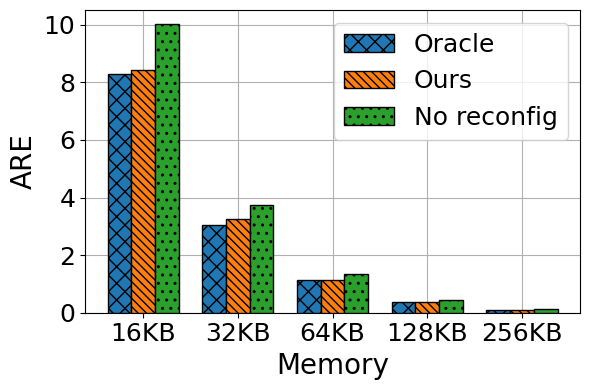

In [47]:
def plot_hh_overall(datasets=pcap_file, width=[1024, 2048, 4096, 8192, 16384], fs=[20,18,18]):
    profiles = prepare_profile_selection(datasets=datasets, width=width)
    
    mapping = {"cm":0, "cs":1, "univmon":2}
    
    oracle = profiles[0]
    ours = profiles[1]
    unchange = profiles[2]
    
    AREs = {}
    for w in width:
        AREs[w] = []
    
    for w in width:
        hh_dict = prepare_hh_dict(f'{int(w*4*4/1024)}KB')
        ARE_oracle = []
        ARE_unchange = [] 
        ARE_ours = []
        
        for i, d in enumerate(datasets):
            current_dataset = (d.split("_")[0] if "10" in d else d.split("_")[2])
            # print(oracle[w][i])
            # print(oracle[w][i][-1])
            # print(mapping[hh_dict[oracle[w][i]][-1]])
            # print(hh_dict[current_dataset][mapping[hh_dict[oracle[w][i]][-1]]])
            ARE_oracle.append(hh_dict[current_dataset][mapping[hh_dict[oracle[w][i]][-1]]])
            ARE_unchange.append(hh_dict[current_dataset][mapping[hh_dict[unchange[w][i]][-1]]])
            if ours[w][i] not in hh_dict.keys():
                ARE_ours.append(hh_dict[current_dataset][mapping[hh_dict[unchange[w][i]][-1]]])
            else:
                ARE_ours.append(hh_dict[current_dataset][mapping[hh_dict[ours[w][i]][-1]]])
            
        ARE = []
        ARE.append(round(np.mean(ARE_oracle),2))
        ARE.append(round(np.mean(ARE_ours),2))
        ARE.append(round(np.mean(ARE_unchange),2))
        # ARE.append((np.mean(ARE_oracle), max(ARE_oracle)))
        # ARE.append((np.mean(ARE_ours), max(ARE_ours)))
        # ARE.append((np.mean(ARE_unchange), max(ARE_unchange)))
        
        AREs[w] = ARE
        # print(f"{w}")
        # print(f'{ARE[0]} {ARE[1]} {ARE[2]}')    
    print(AREs)
    
    # Writing the dictionary to a CSV file
    with open('../result_plot/5_overall/hh_output.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(['memory', 'Oracle', 'Ours', 'No reconfig'])
        
        # Write the data
        for key, values in AREs.items():
            writer.writerow([key] + values)
            
    # plot 
    oracle_means = [AREs[w][0] for w in width]
    ours_means = [AREs[w][1] for w in width]
    unchange_means = [AREs[w][2] for w in width]
    # oracle_means = [AREs[w][0][0] for w in width]
    # oracle_max = [AREs[w][0][1] for w in width]
    # ours_means = [AREs[w][1][0] for w in width]
    # ours_max = [AREs[w][1][1] for w in width]
    # unchange_means = [AREs[w][2][0] for w in width]
    # unchange_max = [AREs[w][2][1] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('ARE', fontsize=fs[0])
    # ax.set_title('ARE by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2])

    fig.tight_layout()

    plt.show()        
    
    return
plot_hh_overall()

{1024: [1.12, 1.16, 1.19], 2048: [0.91, 0.94, 0.98], 4096: [0.78, 0.78, 0.83], 8192: [0.64, 0.65, 0.68], 16384: [0.52, 0.52, 0.56]}


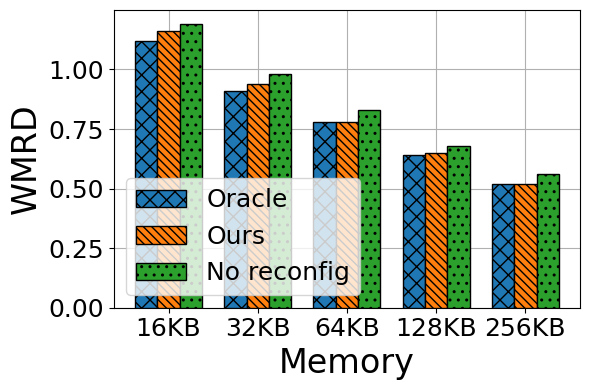

In [43]:
def plot_fsd_overall(datasets=pcap_file, width=[1024, 2048, 4096, 8192, 16384], fs=[24,18,18]):
    profiles = prepare_profile_selection(datasets=datasets, width=width)
    
    mapping = {"cm":0, "cs":1, "univmon":2}
    
    oracle = profiles[0]
    ours = profiles[1]
    unchange = profiles[2]
    
    WMRDs = {}
    for w in width:
        WMRDs[w] = []
    
    for w in width:
        fsd_dict = prepare_fsd_dict(f'{int(w*4*4/1024)}KB')
        WMRD_oracle = []
        WMRD_unchange = [] 
        WMRD_ours = []
        
        for i, d in enumerate(datasets):
            current_dataset = (d.split("_")[0] if "10" in d else d.split("_")[2])
            # print(oracle[w][i])
            # print(oracle[w][i][-1])
            # print(mapping[fsd_dict[oracle[w][i]][-1]])
            # print(fsd_dict[current_dataset][mapping[fsd_dict[oracle[w][i]][-1]]])
            WMRD_oracle.append(fsd_dict[current_dataset][mapping[fsd_dict[oracle[w][i]][-1]]])
            WMRD_unchange.append(fsd_dict[current_dataset][mapping[fsd_dict[unchange[w][i]][-1]]])
            if ours[w][i] not in fsd_dict.keys():
                WMRD_ours.append(fsd_dict[current_dataset][mapping[fsd_dict[unchange[w][i]][-1]]])
            else:
                WMRD_ours.append(fsd_dict[current_dataset][mapping[fsd_dict[ours[w][i]][-1]]])
            
        WMRD = []
        WMRD.append(round(np.mean(WMRD_oracle),2))
        WMRD.append(round(np.mean(WMRD_ours),2))
        WMRD.append(round(np.mean(WMRD_unchange),2))
        # WMRD.append((np.mean(WMRD_oracle), max(WMRD_oracle)))
        # WMRD.append((np.mean(WMRD_ours), max(WMRD_ours)))
        # WMRD.append((np.mean(WMRD_unchange), max(WMRD_unchange)))
        
        WMRDs[w] = WMRD
        # print(f"{w}")
        # print(f'{WMRD[0]} {WMRD[1]} {WMRD[2]}')    
    print(WMRDs)
    
    # Writing the dictionary to a CSV file
    with open('../result_plot/5_overall/fsd_output.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(['memory', 'Oracle', 'Ours', 'No reconfig'])
        
        # Write the data
        for key, values in WMRDs.items():
            writer.writerow([key] + values)
            
    # plot 
    oracle_means = [WMRDs[w][0] for w in width]
    ours_means = [WMRDs[w][1] for w in width]
    unchange_means = [WMRDs[w][2] for w in width]
    # oracle_means = [WMRDs[w][0][0] for w in width]
    # oracle_max = [WMRDs[w][0][1] for w in width]
    # ours_means = [WMRDs[w][1][0] for w in width]
    # ours_max = [WMRDs[w][1][1] for w in width]
    # unchange_means = [WMRDs[w][2][0] for w in width]
    # unchange_max = [WMRDs[w][2][1] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('WMRD', fontsize=fs[0])
    # ax.set_title('WMRD by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2], loc='lower left')

    fig.tight_layout()

    plt.show()        
    
    return
plot_fsd_overall()

{1024: [14.52, 14.52, 14.52], 2048: [10.1, 10.1, 10.1], 4096: [6.79, 6.79, 6.79], 8192: [4.37, 4.37, 4.37], 16384: [2.15, 2.63, 3.68]}


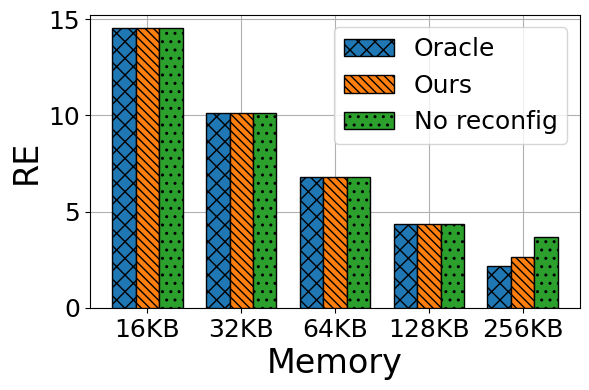

In [44]:
def plot_ent_overall(datasets=pcap_file, width=[1024, 2048, 4096, 8192, 16384], fs=[24,18,18]):
    profiles = prepare_profile_selection(datasets=datasets, width=width)
    
    mapping = {"cm":0, "cs":1, "univmon":2}
    
    oracle = profiles[0]
    ours = profiles[1]
    unchange = profiles[2]
    
    REs = {}
    for w in width:
        REs[w] = []
    
    for w in width:
        ent_dict = prepare_ent_dict(f'{int(w*4*4/1024)}KB')
        RE_oracle = []
        RE_unchange = [] 
        RE_ours = []
        
        for i, d in enumerate(datasets):
            current_dataset = (d.split("_")[0] if "10" in d else d.split("_")[2])
            # print(oracle[w][i])
            # print(oracle[w][i][-1])
            # print(mapping[ent_dict[oracle[w][i]][-1]])
            # print(ent_dict[current_dataset][mapping[ent_dict[oracle[w][i]][-1]]])
            RE_oracle.append(ent_dict[current_dataset][mapping[ent_dict[oracle[w][i]][-1]]])
            RE_unchange.append(ent_dict[current_dataset][mapping[ent_dict[unchange[w][i]][-1]]])
            if ours[w][i] not in ent_dict.keys():
                RE_ours.append(ent_dict[current_dataset][mapping[ent_dict[unchange[w][i]][-1]]])
            else:
                RE_ours.append(ent_dict[current_dataset][mapping[ent_dict[ours[w][i]][-1]]])
            
        RE = []
        RE.append(round(np.mean(RE_oracle),2))
        RE.append(round(np.mean(RE_ours),2))
        RE.append(round(np.mean(RE_unchange),2))
        # RE.append((np.mean(RE_oracle), max(RE_oracle)))
        # RE.append((np.mean(RE_ours), max(RE_ours)))
        # RE.append((np.mean(RE_unchange), max(RE_unchange)))
        
        REs[w] = RE
        # print(f"{w}")
        # print(f'{RE[0]} {RE[1]} {RE[2]}')    
    print(REs)
    
    # Writing the dictionary to a CSV file
    with open('../result_plot/5_overall/ent_output.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(['memory', 'Oracle', 'Ours', 'No reconfig'])
        
        # Write the data
        for key, values in REs.items():
            writer.writerow([key] + values)
            
    # plot 
    oracle_means = [REs[w][0] for w in width]
    ours_means = [REs[w][1] for w in width]
    unchange_means = [REs[w][2] for w in width]
    # oracle_means = [REs[w][0][0] for w in width]
    # oracle_max = [REs[w][0][1] for w in width]
    # ours_means = [REs[w][1][0] for w in width]
    # ours_max = [REs[w][1][1] for w in width]
    # unchange_means = [REs[w][2][0] for w in width]
    # unchange_max = [REs[w][2][1] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('RE', fontsize=fs[0])
    # ax.set_title('RE by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2])

    fig.tight_layout()

    plt.show()        
    
    return
plot_ent_overall()